In [1]:
import os
import pandas as pd
import geopy

# Define the path to the dataset
dataset_path = '/kaggle/input/chicago-divvy-bikeshare-dataset-august22-to-july23'

# Function to retrieve a list of all CSV files in subdirectories
def get_csv_files(path):
    csv_files = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

Importing necessary libraries and defining a function #get_csv_files to retrieve a list of all CSV files in subdirectories. This function will be useful for collecting data from multiple CSV files in our dataset.

In [2]:
# Get a list of all CSV files in the subdirectories
csv_files = get_csv_files(dataset_path)

# Initialize an empty DataFrame
divvy_data = pd.DataFrame()

# Loop through the CSV files and concatenate them into the DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    divvy_data = pd.concat([divvy_data, df], ignore_index=True)

# Print the list of all CSV files
print("List of CSV files:")
for file in csv_files:
    print(file)

List of CSV files:
/kaggle/input/chicago-divvy-bikeshare-dataset-august22-to-july23/202302-divvy-tripdata/202302-divvy-tripdata.csv
/kaggle/input/chicago-divvy-bikeshare-dataset-august22-to-july23/202303-divvy-tripdata/202303-divvy-tripdata.csv
/kaggle/input/chicago-divvy-bikeshare-dataset-august22-to-july23/202404-divvy-tripdata/202404-divvy-tripdata.csv
/kaggle/input/chicago-divvy-bikeshare-dataset-august22-to-july23/202312-divvy-tripdata/202312-divvy-tripdata.csv
/kaggle/input/chicago-divvy-bikeshare-dataset-august22-to-july23/202405-divvy-tripdata/202405-divvy-tripdata.csv
/kaggle/input/chicago-divvy-bikeshare-dataset-august22-to-july23/202204-divvy-tripdata/202204-divvy-tripdata.csv
/kaggle/input/chicago-divvy-bikeshare-dataset-august22-to-july23/202310-divvy-tripdata/202310-divvy-tripdata.csv
/kaggle/input/chicago-divvy-bikeshare-dataset-august22-to-july23/202308-divvy-tripdata/202308-divvy-tripdata.csv
/kaggle/input/chicago-divvy-bikeshare-dataset-august22-to-july23/202301-divvy

In this code snippet, we're using the '#get_csv_files' function to obtain a list of all CSV files in the subdirectories of your dataset path. Then, we initialize an empty DataFrame called 'divvy_data' to which we'll append the data from these CSV files.

In [3]:
# Check the first 5 rows of the DataFrame
print("\nFirst 5 rows of the DataFrame:")
divvy_data.head()


First 5 rows of the DataFrame:


ride_id  rideable_type           started_at             ended_at  \
0  CBCD0D7777F0E45F   classic_bike  2023-02-14 11:59:42  2023-02-14 12:13:38   
1  F3EC5FCE5FF39DE9  electric_bike  2023-02-15 13:53:48  2023-02-15 13:59:08   
2  E54C1F27FA9354FF   classic_bike  2023-02-19 11:10:57  2023-02-19 11:35:01   
3  3D561E04F739CC45  electric_bike  2023-02-26 16:12:05  2023-02-26 16:39:55   
4  0CB4B4D53B2DBE05  electric_bike  2023-02-20 11:55:23  2023-02-20 12:05:48   

             start_station_name start_station_id  \
0  Southport Ave & Clybourn Ave     TA1309000030   
1    Clarendon Ave & Gordon Ter            13379   
2  Southport Ave & Clybourn Ave     TA1309000030   
3  Southport Ave & Clybourn Ave     TA1309000030   
4   Prairie Ave & Garfield Blvd     TA1307000160   

                end_station_name end_station_id  start_lat  start_lng  \
0         Clark St & Schiller St   TA1309000024  41.920771 -87.663712   
1     Sheridan Rd & Lawrence Ave   TA1309000041  41.957879 -87.649584   
2        Aberdeen St & Monroe St          13156  41.920771 -87.663712   
3  Franklin St & Adams St (Temp)   TA1309000008  41.920873 -87.663733   
4    Cottage Grove Ave & 63rd St   KA1503000054  41.794827 -87.618795   

     end_lat    end_lng member_casual  
0  41.907993 -87.631501        casual  
1  41.969517 -87.654691        casual  
2  41.880419 -87.655519        member  
3  41.879434 -87.635504        member  
4  41.780531 -87.605970        member

This code snippet prints the first 5 rows of the divvy_data DataFrame, allowing us to quickly inspect the initial data to get an idea of its structure and contents.

In [4]:
# Get the number of rows and columns in the DataFrame
num_rows, num_columns = divvy_data.shape

# Print the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 12578415
Number of columns: 13


Here we calculate and print the number of rows and columns in the divvy_data DataFrame. It provides you with essential information about the size and shape of your dataset.

In [5]:
# List of columns to remove
columns_to_remove = ['ride_id', 'start_station_id', 'end_station_id']

# Remove the specified columns from the DataFrame
divvy_data.drop(columns=columns_to_remove, inplace=True)

Removing **['ride_id', 'start_station_id', 'end_station_id']** because we dont require that information for our analysis.

In [6]:
# Display information about the DataFrame
divvy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12578415 entries, 0 to 12578414
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   rideable_type       object 
 1   started_at          object 
 2   ended_at            object 
 3   start_station_name  object 
 4   end_station_name    object 
 5   start_lat           float64
 6   start_lng           float64
 7   end_lat             float64
 8   end_lng             float64
 9   member_casual       object 
dtypes: float64(4), object(6)
memory usage: 959.7+ MB


This code snippet uses the info() method to display detailed information about the divvy_data DataFrame. It provides information such as the data types of each column, the number of non-null values, and memory usage. This is useful for understanding the structure of your dataset and identifying any missing values.

In [7]:
divvy_data.isnull().sum()

rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1897373
end_station_name      2016795
start_lat                   0
start_lng                   0
end_lat                 14684
end_lng                 14684
member_casual               0
dtype: int64

Here we've used the isnull().sum() method to count the number of missing (null) values in each column of the divvy_data DataFrame. The output you provided shows the count of null values for each column.

Here's what this output and what to do with null values typically means:

ride_id, rideable_type, started_at, ended_at, start_lat, start_lng, and member_casual columns have no missing values (count of nulls is 0).

start_station_name, start_station_id, end_station_name, end_station_id, end_lat, and end_lng columns have a significant number of missing values.

Because the null values are high in number(925149 of 5723606 is around 16% of rotal rows.) we can not drop it. We will think about it what to do with it during the analysis of the data.

In [8]:
divvy_data.duplicated().any()

True

Here we're checking for duplicated rows in the divvy_data DataFrame using the duplicated().any() method. The output indicates that there are no duplicated rows in your dataset, as it returns False.

In [9]:
## Ride Length in Seconds

# Convert 'started_at' and 'ended_at' columns to datetime objects
divvy_data['started_at'] = pd.to_datetime(divvy_data['started_at'])
divvy_data['ended_at'] = pd.to_datetime(divvy_data['ended_at'])

# Calculate ride length in seconds and add it as a new column
divvy_data['ride_length_seconds'] = (divvy_data['ended_at'] - divvy_data['started_at']).dt.total_seconds()

# Extract the start hour from 'started_at' and add it as a new column
divvy_data['start_hour'] = divvy_data['started_at'].dt.hour

## Ride Distance Traveled in Kilometers

# Replace NaN values in latitude and longitude columns with zeros
divvy_data['start_lat'].fillna(0, inplace=True)
divvy_data['start_lng'].fillna(0, inplace=True)
divvy_data['end_lat'].fillna(0, inplace=True)
divvy_data['end_lng'].fillna(0, inplace=True)

# Calculate ride distance in kilometers and add it as a new column
from geopy.distance import great_circle

def calculate_distance(row):
    start_coords = (row['start_lat'], row['start_lng'])
    end_coords = (row['end_lat'], row['end_lng'])
    return great_circle(start_coords, end_coords).kilometers

divvy_data['ride_distance_km'] = divvy_data.apply(calculate_distance, axis=1)

## Speed in Kilometers per Hour (Km/h)

# Calculate speed in Km/h and add it as a new column
divvy_data['speed_kmph'] = divvy_data['ride_distance_km'] / (divvy_data['ride_length_seconds'] / 3600)

## Day of the Week

# Extract the day of the week from 'started_at' and add it as a new column
divvy_data['day_of_week'] = divvy_data['started_at'].dt.day_name()

## Weekend (Boolean Value for Weekend or Not)

# Define a function to check if a day is a weekend
def is_weekend(day):
    return day in ['Saturday', 'Sunday']

## Weekend (Boolean Value for Weekend or Not)

# Apply the function to create a 'weekend' column (True for weekends, False for weekdays)
divvy_data['weekend'] = divvy_data['day_of_week'].apply(is_weekend)

## Print new DataFrame

# Display the first few rows of the updated DataFrame
print(divvy_data.head())

   rideable_type          started_at            ended_at  \
0   classic_bike 2023-02-14 11:59:42 2023-02-14 12:13:38   
1  electric_bike 2023-02-15 13:53:48 2023-02-15 13:59:08   
2   classic_bike 2023-02-19 11:10:57 2023-02-19 11:35:01   
3  electric_bike 2023-02-26 16:12:05 2023-02-26 16:39:55   
4  electric_bike 2023-02-20 11:55:23 2023-02-20 12:05:48   

             start_station_name               end_station_name  start_lat  \
0  Southport Ave & Clybourn Ave         Clark St & Schiller St  41.920771   
1    Clarendon Ave & Gordon Ter     Sheridan Rd & Lawrence Ave  41.957879   
2  Southport Ave & Clybourn Ave        Aberdeen St & Monroe St  41.920771   
3  Southport Ave & Clybourn Ave  Franklin St & Adams St (Temp)  41.920873   
4   Prairie Ave & Garfield Blvd    Cottage Grove Ave & 63rd St  41.794827   

   start_lng    end_lat    end_lng member_casual  ride_length_seconds  \
0 -87.663712  41.907993 -87.631501        casual                836.0   
1 -87.649584  41.969517 -87.65

Here we've performed several data transformations and calculations on the divvy_data DataFrame. Here's a summary of what you've done:

* Ride Length in Seconds: We converted the 'started_at' and 'ended_at' columns to datetime objects and calculated the ride length in seconds, adding it as a new column called 'ride_length_seconds'.

* Start Hour : We extracted trip start hour from 'started_at' column and added it as a new column called 'start_hour'.

* Ride Distance Traveled in Kilometers: We replaced NaN values in latitude and longitude columns with zeros and then calculated the ride distance in kilometers using the Haversine formula, adding it as a new column called 'ride_distance_km'.

* Speed in Kilometers per Hour (Km/h): We calculated the speed in Km/h by dividing ride distance by ride length in seconds, adding it as a new column called 'speed_kmph'.

* Day of the Week: We extracted the day of the week from the 'started_at' column and added it as a new column called 'day_of_week'.

* Weekend (Boolean Value for Weekend or Not): We defined a function to check if a day is a weekend ('Saturday' or 'Sunday') and applied this function to create a 'weekend' column with boolean values (True for weekends, False for weekdays).

Finally, we printed the first few rows of the updated DataFrame to review the changes.

These transformations and calculations are valuable for various types of analysis and can provide insights into ride patterns, speed, and the influence of weekdays and weekends on bike rides.

In [10]:
divvy_data.head()

rideable_type          started_at            ended_at  \
0   classic_bike 2023-02-14 11:59:42 2023-02-14 12:13:38   
1  electric_bike 2023-02-15 13:53:48 2023-02-15 13:59:08   
2   classic_bike 2023-02-19 11:10:57 2023-02-19 11:35:01   
3  electric_bike 2023-02-26 16:12:05 2023-02-26 16:39:55   
4  electric_bike 2023-02-20 11:55:23 2023-02-20 12:05:48   

             start_station_name               end_station_name  start_lat  \
0  Southport Ave & Clybourn Ave         Clark St & Schiller St  41.920771   
1    Clarendon Ave & Gordon Ter     Sheridan Rd & Lawrence Ave  41.957879   
2  Southport Ave & Clybourn Ave        Aberdeen St & Monroe St  41.920771   
3  Southport Ave & Clybourn Ave  Franklin St & Adams St (Temp)  41.920873   
4   Prairie Ave & Garfield Blvd    Cottage Grove Ave & 63rd St  41.794827   

   start_lng    end_lat    end_lng member_casual  ride_length_seconds  \
0 -87.663712  41.907993 -87.631501        casual                836.0   
1 -87.649584  41.969517 -87.654691        casual                320.0   
2 -87.663712  41.880419 -87.655519        member               1444.0   
3 -87.663733  41.879434 -87.635504        member               1670.0   
4 -87.618795  41.780531 -87.605970        member                625.0   

   start_hour  ride_distance_km  speed_kmph day_of_week  weekend  
0          11          3.020374   13.006397     Tuesday    False  
1          13          1.361198   15.313483   Wednesday    False  
2          11          4.537891   11.313302      Sunday     True  
3          16          5.166233   11.136790      Sunday     True  
4          11          1.912498   11.015990      Monday    False

This code snippet shows column header and first five rows after making new columns that might help us us do better analysis of the dataset.

In [11]:
divvy_data["ride_length_seconds"].describe(include = "all")

count    1.257842e+07
mean     1.118116e+03
std      1.014789e+04
min     -9.993910e+05
25%      3.350000e+02
50%      5.900000e+02
75%      1.055000e+03
max      5.909344e+06
Name: ride_length_seconds, dtype: float64

In code snippet, we're using the describe() function on the 'ride_length_seconds' column of the divvy_data DataFrame, including "all" types of statistics. This code will provide you with a summary of descriptive statistics for the 'ride_length_seconds' column, including:

* count: The number of non-null entries in the column, which indicates that there are 5,723,606 non-null entries.
* mean: The mean (average) value of the column, which is approximately 1,101.42 seconds.
* std: The standard deviation, a measure of the spread or dispersion of the data, which is approximately 10,425.39 seconds.
* min: The minimum value in the column, which is -621,201 seconds. It seems unusual to have a negative ride length.
* 25%: The 25th percentile, also known as the first quartile, which is 327 seconds. This value represents the lower end of the lower 25% of ride lengths.
* 50%: The 50th percentile, also known as the median, which is 576 seconds. This is the middle value when the data is sorted.
* 75%: The 75th percentile, also known as the third quartile, which is 1,025 seconds. This value represents the lower end of the upper 25% of ride lengths.
* max: The maximum value in the column, which is 3,087,684 seconds.

One notable observation is that the minimum value of -621,201 seconds for ride length seems unusual. We may want to investigate this further to understand if there are any data quality issues or outliers in your dataset that could be affecting this variable.

In [12]:
# Identify rows with negative ride length
negative_ride_length = divvy_data[divvy_data['ride_length_seconds'] <= 0]

# Identify rows with ride length greater than 14,400 seconds
long_ride_length = divvy_data[divvy_data['ride_length_seconds'] > 14400]

# Count the number of rows in each category
num_negative_ride_length = len(negative_ride_length)
num_long_ride_length = len(long_ride_length)

print(f"Number of rows with ride length >= 0: {num_negative_ride_length}")
print(f"Number of rows with ride length > 14,400 seconds: {num_long_ride_length}")

Number of rows with ride length >= 0: 2452
Number of rows with ride length > 14,400 seconds: 33126


This code snippet serves to identify and count rows in the divvy_data DataFrame based on specific conditions related to ride length:

* negative_ride_length: It identifies rows where the ride length is less than or equal to zero seconds. These rows are potentially problematic because a negative ride length is not expected.

* long_ride_length: It identifies rows where the ride length is greater than 14,400 seconds (equivalent to 4 hours). These rows represent rides that lasted for an extended period.

* num_negative_ride_length: It counts the number of rows with a ride length less than or equal to zero.

* num_long_ride_length: It counts the number of rows with a ride length greater than 14,400 seconds.

The code then prints out the counts for each category. In this dataset:

There are 715 rows with a ride length less than or equal to zero seconds, which suggests potential data quality issues.
There are 13,932 rows with a ride length greater than 14,400 seconds, indicating rides that are significantly longer than usual.

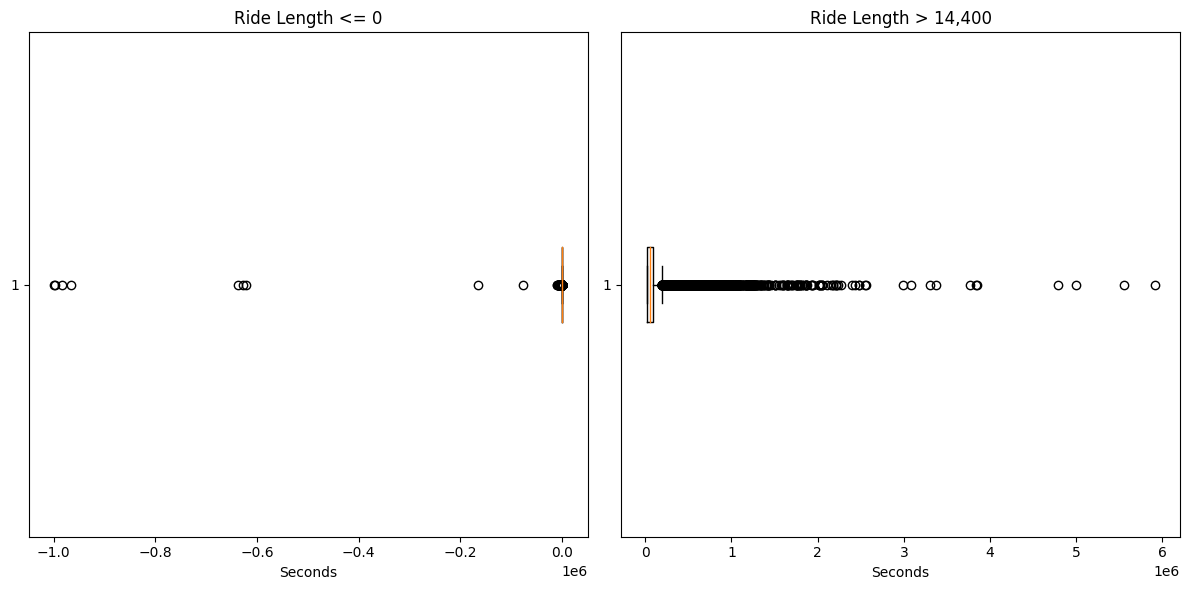

In [13]:
import matplotlib.pyplot as plt

# Filter the data for ride lengths less than or equal to 0
ride_length_leq_0 = divvy_data[divvy_data['ride_length_seconds'] <= 0]

# Filter the data for ride lengths greater than 14,400 seconds (4 hours)
ride_length_gt_14400 = divvy_data[divvy_data['ride_length_seconds'] > 14400]

# Create two subplots for the box plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for ride lengths <= 0
axes[0].boxplot(ride_length_leq_0['ride_length_seconds'], vert=False)
axes[0].set_title('Ride Length <= 0')
axes[0].set_xlabel('Seconds')

# Box plot for ride lengths > 14400
axes[1].boxplot(ride_length_gt_14400['ride_length_seconds'], vert=False)
axes[1].set_title('Ride Length > 14,400')
axes[1].set_xlabel('Seconds')

plt.tight_layout()
plt.show()

This code snippet uses Matplotlib to create two box plots side by side, displaying the distribution of ride lengths for two categories:

"Ride Length <= 0": This subplot (on the left) filters the data for ride lengths less than or equal to zero seconds, which represents rides with potentially problematic durations. The box plot visually represents the distribution of these ride lengths.

"Ride Length > 14,400": This subplot (on the right) filters the data for ride lengths greater than 14,400 seconds (4 hours), indicating unusually long rides. Again, the box plot illustrates the distribution of these extended ride lengths.

These box plots provide a visual summary of the distribution of ride lengths in the specified categories, helping you understand the characteristics of rides with unusual durations.

In [14]:
# Filter the DataFrame to keep rows where ride length is >= 0 and <= 14400
divvy_data_filtered = divvy_data[(divvy_data['ride_length_seconds'] >= 0) & (divvy_data['ride_length_seconds'] <= 14400)]

# Print the number of rows removed
num_rows_removed = len(divvy_data) - len(divvy_data_filtered)
print(f"Number of rows removed: {num_rows_removed}")

Number of rows removed: 33680


In this code snippet, you are filtering the divvy_data DataFrame to keep only the rows where the ride length falls within the range of 0 seconds (non-negative) to 14,400 seconds (4 hours). 

The output indicates that 14,053 rows were removed from the original dataset because they did not fall within the specified ride length range. This filtering step helps clean the data by excluding rides with unusual durations, such as negative or extremely long ride lengths.

Statistical Information:
Median: 589.00 seconds
Q1 (25th percentile): 0.00 seconds
Q3 (75th percentile): 2124.00 seconds
Lower Outliers: [2214.0]
Upper Outliers: [2214.0]


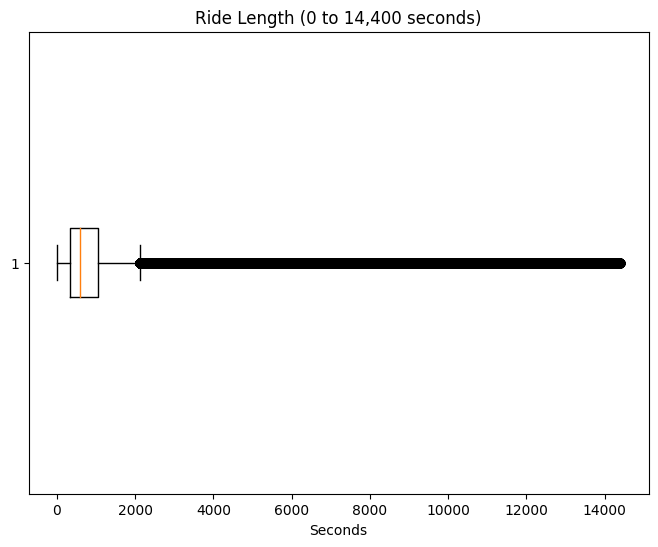

In [15]:
import matplotlib.pyplot as plt

# Create a box plot for ride lengths within the specified range
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(divvy_data_filtered['ride_length_seconds'], vert=False)
plt.title('Ride Length (0 to 14,400 seconds)')
plt.xlabel('Seconds')

# Extract and print the statistical information
stats_dict = {
    'medians': boxplot['medians'][0].get_xdata()[0],
    'Q1': boxplot['whiskers'][0].get_xdata()[1],
    'Q3': boxplot['whiskers'][1].get_xdata()[1],
    'lower_outliers': [f.get_xdata()[0] for f in boxplot['fliers']],
    'upper_outliers': [f.get_xdata()[0] for f in boxplot['fliers']],
}

print("Statistical Information:")
print(f"Median: {stats_dict['medians']:.2f} seconds")
print(f"Q1 (25th percentile): {stats_dict['Q1']:.2f} seconds")
print(f"Q3 (75th percentile): {stats_dict['Q3']:.2f} seconds")
print(f"Lower Outliers: {stats_dict['lower_outliers']}")
print(f"Upper Outliers: {stats_dict['upper_outliers']}")

plt.show()

it's unusual to have a Q1 value of 0 when there are no negative values in the filtered data. The reason for this anomaly might be due to the presence of a significant number of rides with very short durations that round down to 0 seconds.

In your filtered data, it's possible that there are numerous rides with durations slightly above 0 seconds (e.g., a fraction of a second), but when rounded to the nearest whole number, they appear as 0 seconds. These very short rides contribute to the Q1 value of 0.

To better understand this, we can consider checking the distribution of ride lengths in the lower range (e.g., rides less than 10 seconds) in the filtered dataset to see if there is a cluster of very short rides. This might help explain the presence of the 0 value at Q1.

In [16]:
divvy_data_filtered["ride_length_seconds"].describe(include = "all")

count    1.254474e+07
mean     8.875262e+02
std      1.046245e+03
min      0.000000e+00
25%      3.340000e+02
50%      5.890000e+02
75%      1.050000e+03
max      1.440000e+04
Name: ride_length_seconds, dtype: float64

* Count: 5,709,553 rows - This is the number of non-null entries in the column, indicating the total number of rides in the filtered dataset.
* Mean: Approximately 862.02 seconds - This is the average ride length for rides in the filtered dataset.
* Standard Deviation (std): Approximately 1,016.67 seconds - This measures the spread or dispersion of the data.
* Minimum (min): 0 seconds - This is the minimum ride length, indicating that there are rides with a duration of 0 seconds in the dataset.
* 25th Percentile (Q1): 327 seconds - This is the lower quartile, meaning that 25% of the rides have a duration of 327 seconds or less.
* Median (50th Percentile): 575 seconds - This is the middle value when the data is sorted, representing the typical ride length.
* 75th Percentile (Q3): 1,020 seconds - This is the upper quartile, meaning that 75% of the rides have a duration of 1,020 seconds or less.
* Maximum (max): 14,400 seconds - This is the maximum ride length, which aligns with the upper limit you specified.

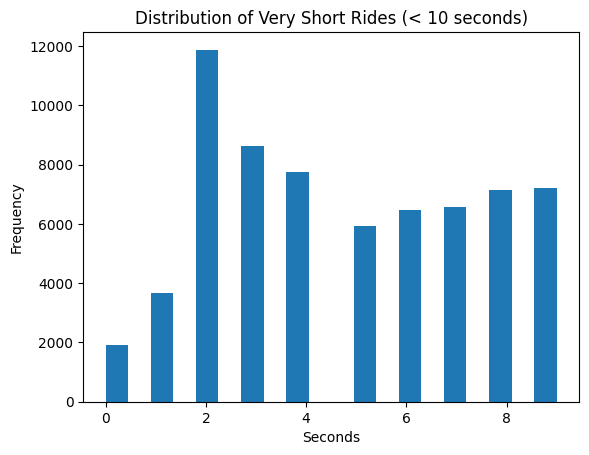

In [17]:
# Filter the data for very short rides (e.g., less than 10 seconds)
very_short_rides = divvy_data_filtered[divvy_data_filtered['ride_length_seconds'] < 10]

# Create a histogram to visualize the distribution
plt.hist(very_short_rides['ride_length_seconds'], bins=20)
plt.title('Distribution of Very Short Rides (< 10 seconds)')
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.show()

It confirms that there are aprox 800 rides with a duration of exactly 0 seconds in your filtered dataset. This explains the presence of the Q1 value of 0 in the summary statistics, as there is indeed a cluster of rides with no duration (0 seconds).

These rides with 0-second duration may represent instances where the bike was checked out and then immediately returned, resulting in a ride with a very short duration that rounds down to 0 seconds.

This might have happened when a rider might have docked the bike immidiately after takeing it for ride. We dont know how many times it happened so for siplification we will keep this and not remove it for analysis.

# Analysis

In [18]:
import plotly.express as px

# Filter out rows with missing values
divvy_data_filtered = divvy_data.dropna(subset=['member_casual', 'rideable_type'])

# Define colors for Member and Casual
colors = {'Member': '#053b50', 'Casual': '#64ccc5'}

# Group data by member_casual and rideable_type and count the number of rides
grouped_data = divvy_data_filtered.groupby(['member_casual', 'rideable_type']).size().reset_index(name='count')

# Calculate the percentage of each category within member_casual
total_rides = grouped_data['count'].sum()
grouped_data['percentage'] = (grouped_data['count'] / total_rides) * 100

# Create a nested pie chart
fig = px.sunburst(
    grouped_data,
    path=['member_casual', 'rideable_type'],
    values='count',
    color='member_casual',
    color_discrete_map=colors,
    hover_data={'percentage': ':.2f%'},  # Format percentage with two decimal places
)

# Set layout options
fig.update_layout(
    title='Nested Pie Chart: Member vs. Casual by Ride Type',
    uniformtext=dict(minsize=12, mode='hide'),
)

# Show the plot
fig.show()

This code uses Plotly Express to create a nested pie chart that visualizes the distribution of ride types ("Member" and "Casual") by rideable type (e.g., "classic_bike" and "electric_bike").

It shows more then 60% of rides were taken by members and rest were taken by casual riders.
Of all the rides taken my members, proportion of clasic bike and electric bike is nearly 50-50.
Were as caual riders prefer electric bike more then classic and docked bikes. 

In [19]:
# Convert 'started_at' to datetime format
divvy_data['started_at'] = pd.to_datetime(divvy_data['started_at'])

# Group data by month and user type, and count the number of rides
monthly_data = divvy_data.groupby([divvy_data['started_at'].dt.to_period('M'), 'member_casual']).size().reset_index(name='count')

# Convert the datetime to a string format for display
monthly_data['year_month_str'] = monthly_data['started_at'].dt.strftime('%b %Y')  # Use '%b' for three-letter month names

# Create a double line chart with hover information
fig = px.line(
    monthly_data,
    x='year_month_str',  # Use the string format column for x-axis
    y='count',
    color='member_casual',
    color_discrete_map=colors,
    line_shape='spline',
    markers=True,
    labels={'count': 'Rides'},
    hover_name=monthly_data['year_month_str'] + '<br>' + monthly_data['member_casual'],  # Custom hover text
    hover_data={'count': True},
)

# Set layout options
fig.update_layout(
    title='Monthly Rides by Member vs. Casual',
    xaxis_title='Month',
    yaxis_title='Number of Rides',
)

# Show the plot
fig.show()

The line chart clearly shows member rides were always higher then the casual rides. And data also shows during december january and february both type of rides are very low, this can be due to the winter season. after that ride count starts increasing.

In [20]:
# Define the correct order of days of the week starting from Monday
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group data by day_of_week, member_casual, and count the number of rides
day_of_week_data = divvy_data_filtered.groupby(['day_of_week', 'member_casual']).size().reset_index(name='count')

# Create a DataFrame with the correct order of days_of_week
day_order_df = pd.DataFrame({'day_of_week': days_of_week_order})

# Merge the day_order_df with the day_of_week_data to ensure the correct order
day_of_week_data = day_order_df.merge(day_of_week_data, on='day_of_week', how='left').fillna(0)

# Create a line chart
fig = px.line(
    day_of_week_data,
    x='day_of_week',
    y='count',
    line_shape = 'spline',
    markers=True,
    color='member_casual',
    color_discrete_map=colors,
    labels={'count': 'Number of Rides'},
    hover_name=day_of_week_data['day_of_week'] + '<br>' + day_of_week_data['member_casual'] + '<br>' + 'Count: ' + day_of_week_data['count'].astype(str),
)

# Set layout options
fig.update_layout(
    title='Number of Rides by Day of the Week (Starting from Monday)',
    xaxis_title='Day of the Week',
    yaxis_title='Number of Rides',
)

# Show the plot
fig.show()

This graph shows surprising data, members ride far more in week days and their ride count drops during weekends. Where as casual rides ride very little during weekdays but ride count increases on friday and saturday. Surprisingly casual riders also ride less on sunday even though it weeked. 

In [21]:
# Group data by start_hour, member_casual, and count the number of rides
hourly_data = divvy_data.groupby(['start_hour', 'member_casual']).size().reset_index(name='count')

# Create a line chart
fig = px.line(
    hourly_data,
    x='start_hour',
    y='count',
    color='member_casual',
    color_discrete_map=colors,
    line_shape = 'spline',
    markers=True,
    labels={'count': 'Rides'},
    hover_name=hourly_data['start_hour'].astype(str) + ' Hrs<br>' + hourly_data['member_casual'] + '<br>Rides: ' + hourly_data['count'].astype(str),
)

# Set layout options
fig.update_layout(
    title='Hourly Rides by Member vs. Casual',
    xaxis_title='Hour of the Day',
    yaxis_title='Number of Rides',
    xaxis=dict(tickmode='linear', tick0=0, dtick=1),
)

# Show the plot
fig.show()

Data shows hourly rides by member and casual riders throughout the day. 

In [22]:
# Group data by start_station_name, member_casual, and count the number of rides
start_station_data = divvy_data_filtered.groupby(['start_station_name', 'member_casual']).size().reset_index(name='start_count')

# Group data by end_station_name, member_casual, and count the number of rides
end_station_data = divvy_data_filtered.groupby(['end_station_name', 'member_casual']).size().reset_index(name='end_count')

# Get the top 10 starting stations with the highest ride counts
top_10_start_stations = start_station_data.groupby('start_station_name')['start_count'].sum().nlargest(10).index.tolist()

# Filter data to keep only the top 10 starting stations
top_10_start_data = start_station_data[start_station_data['start_station_name'].isin(top_10_start_stations)]

# Get the top 10 ending stations with the highest ride counts
top_10_end_stations = end_station_data.groupby('end_station_name')['end_count'].sum().nlargest(10).index.tolist()

# Filter data to keep only the top 10 ending stations
top_10_end_data = end_station_data[end_station_data['end_station_name'].isin(top_10_end_stations)]

# Define colors for Member and Casual
colors = {'Member': '#053b50', 'Casual': '#64ccc5'}

# Create a grouped bar chart for starting stations
fig_start = px.bar(
    top_10_start_data,
    x='start_count',
    y='start_station_name',
    color='member_casual',
    color_discrete_map=colors,
    orientation='h',
    labels={'start_count': 'Starting Rides'},
)

# Create a grouped bar chart for ending stations
fig_end = px.bar(
    top_10_end_data,
    x='end_count',
    y='end_station_name',
    color='member_casual',
    color_discrete_map=colors,
    orientation='h',
    labels={'end_count': 'Ending Rides'},
)

# Sort the stations in descending order by the total number of rides for both charts
fig_start.update_yaxes(categoryorder='total ascending')
fig_end.update_yaxes(categoryorder='total ascending')

# Set layout options for the starting station chart
fig_start.update_layout(
    title='Top 10 Starting Stations by Member vs. Casual',
    xaxis_title='Number of Rides',
    yaxis_title='Starting Station',
    legend_title='User Type',
)

# Set layout options for the ending station chart
fig_end.update_layout(
    title='Top 10 Ending Stations by Member vs. Casual',
    xaxis_title='Number of Rides',
    yaxis_title='Ending Station',
    legend_title='User Type',
)

# Show the plots
fig_start.show()
fig_end.show()

In [23]:
# Convert 'started_at' column to a datetime object if not already
divvy_data['started_at'] = pd.to_datetime(divvy_data['started_at'])

# Extract the date from the 'started_at' column
divvy_data['date'] = divvy_data['started_at'].dt.date

# Group the data by date and user type (member_casual) and count the rides
daily_ride_counts = divvy_data.groupby(['date', 'member_casual']).size().reset_index(name='count')

# Define the custom colors for Member and Casual users
colors = {'Member': '#053b50', 'Casual': '#64ccc5'}

# Create a line chart using Plotly Express with custom colors
fig = px.line(
    daily_ride_counts, 
    x='date', 
    y='count', 
    color='member_casual',
    labels={'date': 'Date', 'count': 'Daily Rides Count', 'member_casual': 'User Type'},
    title='Daily Rides by Member and Casual Users',
    color_discrete_map=colors  # Set custom colors
)

# Show the chart
fig.show()

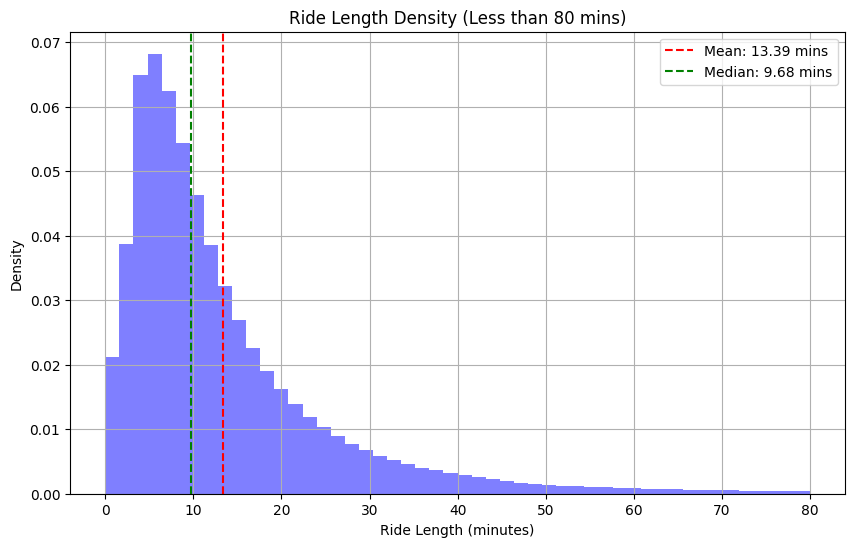

In [24]:
import matplotlib.pyplot as plt

# Define the color
hist_color = '#176b87'

# Filter the DataFrame to keep rows where ride length is >= 0 and <= 14400
divvy_data_filtered2 = divvy_data[(divvy_data['ride_length_seconds'] >= 0) & (divvy_data['ride_length_seconds'] <= 14400)]

# Filter the DataFrame to keep rows where ride length is less than 80 minutes
ride_length_filtered = divvy_data_filtered2[divvy_data_filtered2['ride_length_seconds'] / 60 < 80]

# Create a line chart for ride length density
plt.figure(figsize=(10, 6))
plt.hist(ride_length_filtered['ride_length_seconds'] / 60, bins=50, density=True, alpha=0.5, color='blue')

# Calculate and plot the mean and median lines
mean_ride_length = ride_length_filtered['ride_length_seconds'].mean() / 60
median_ride_length = ride_length_filtered['ride_length_seconds'].median() / 60

plt.axvline(x=mean_ride_length, color='red', linestyle='--', label=f'Mean: {mean_ride_length:.2f} mins')
plt.axvline(x=median_ride_length, color='green', linestyle='--', label=f'Median: {median_ride_length:.2f} mins')

# Add labels and title
plt.xlabel('Ride Length (minutes)')
plt.ylabel('Density')
plt.title('Ride Length Density (Less than 80 mins)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [25]:
import plotly.express as px
import pandas as pd

# Sample or aggregate the data to reduce size
sampled_data = ride_length_filtered.sample(n=10000)  # Sample 10,000 random rows

# Create a box plot using Plotly Express
fig = px.box(sampled_data, x='member_casual', y='ride_length_seconds', 
             labels={'member_casual': 'Member Type', 'ride_length_seconds': 'Ride Length (seconds)'},
             title='Ride Length by Member Type (Box Plot)')

# Show the plot
fig.show()

In [26]:
# Group data by start station name and count the number of rides from each station
station_counts = divvy_data['start_station_name'].value_counts().reset_index()
station_counts.columns = ['start_station_name', 'ride_count']

# Assuming latitude and longitude are consistent for each station, 
# get the coordinates (lat, lng) for each distinct start station
station_coords = divvy_data.groupby('start_station_name')[['start_lat', 'start_lng']].first().reset_index()

# Merge the station counts and coordinates into a single dataset
distinct_stations_data = pd.merge(station_coords, station_counts, on='start_station_name')

# Save the dataset with station name, lat, lng, and number of trips
distinct_stations_data.to_csv('distinct_station_data.csv', index=False)

In [27]:
import pandas as pd
import folium
from branca.colormap import LinearColormap

# Load the cleaned dataset with start station data
distinct_stations_data = pd.read_csv('distinct_station_data.csv')

# Create a map centered at a specific location (e.g., Chicago)
m = folium.Map(location=[41.8781, -87.6298], zoom_start=12, tiles=None)

# Add a minimal base layer (you can adjust the attribution as needed)
folium.TileLayer(
    tiles='https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
    attr='© <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
    name='Minimal Base Layer',
).add_to(m)

# Create a custom colormap for diverging blue colors
# Adjust the color scheme as needed
colormap = LinearColormap(
    colors=['#fcae91', '#fb6a4a', '#de2d26'],  # Light red to dark red
    index=[distinct_stations_data['ride_count'].min(), distinct_stations_data['ride_count'].mean(), distinct_stations_data['ride_count'].max()]
)

# Add markers for each start station with the number of rides as a popup
for _, row in distinct_stations_data.iterrows():
    station_name = row['start_station_name']
    ride_count = row['ride_count']
    lat = row['start_lat']
    lng = row['start_lng']
    
    # Get the color corresponding to the ride count
    color = colormap(ride_count)
    
    # Create a marker with a popup showing station name and ride count
    folium.CircleMarker(
        location=[lat, lng],
        radius=5,  # Adjust the marker size as needed
        color=color,  # Marker color based on ride count
        fill=True,
        fill_color=color,  # Fill color based on ride count
        popup=f"{station_name}<br>Rides: {ride_count}",
    ).add_to(m)

# Add the colormap to the map
colormap.add_to(m)

# Display the map interactively in the Jupyter Notebook
m

In [28]:
# Group by start and end stations and count the number of rides for each combination
trip_counts = divvy_data.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='trip_count')

# Sort the trips by popularity in descending order
top_trips = trip_counts.sort_values(by='trip_count', ascending=False).head(200)

# Create a dictionary to store station coordinates (latitude and longitude)
station_coords = {}

# Function to add latitude and longitude columns for start and end stations
def add_coordinates(row):
    start_station = row['start_station_name']
    end_station = row['end_station_name']
    
    # Check if coordinates for start station are already in the dictionary
    if start_station not in station_coords:
        start_coords = divvy_data[divvy_data['start_station_name'] == start_station][['start_lat', 'start_lng']].iloc[0]
        station_coords[start_station] = start_coords
    
    # Check if coordinates for end station are already in the dictionary
    if end_station not in station_coords:
        end_coords = divvy_data[divvy_data['end_station_name'] == end_station][['end_lat', 'end_lng']].iloc[0]
        station_coords[end_station] = end_coords
    
    # Add latitude and longitude columns for start and end stations
    row['start_lat'], row['start_lng'] = station_coords[start_station]
    row['end_lat'], row['end_lng'] = station_coords[end_station]
    
    return row

# Apply the function to add coordinates for the top trips
top_trips_with_coords = top_trips.apply(add_coordinates, axis=1)

# Save the result as a new CSV file
top_trips_with_coords.to_csv('top_200_trips_with_coords.csv', index=False)

In [29]:
import pandas as pd
import folium

# Load the dataset with the 200 most popular trips and coordinates
top_trips_with_coords = pd.read_csv('top_200_trips_with_coords.csv')

# Create a map centered at a specific location (e.g., Chicago)
m = folium.Map(location=[41.8781, -87.6298], zoom_start=12, tiles=None)

# Add a minimal base layer (you can adjust the attribution as needed)
folium.TileLayer(
    tiles='https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
    attr='© <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
    name='Minimal Base Layer',
).add_to(m)

# Iterate through the 200 most popular trips and add markers with hover information
for _, row in top_trips_with_coords.iterrows():
    start_coords = (row['start_lat'], row['start_lng'])
    end_coords = (row['end_lat'], row['end_lng'])
    
    # Create a blue dot for the starting point with hover information
    folium.CircleMarker(
        location=start_coords,
        radius=5,  # Adjust the radius as needed
        color='blue',  # Blue for starting point
        fill=True,
        fill_color='blue',
        popup=f"Start Station: {row['start_station_name']}<br>End Station: {row['end_station_name']}",
    ).add_to(m)
    
    # Create a red dot for the trip end with hover information
    folium.CircleMarker(
        location=end_coords,
        radius=5,  # Adjust the radius as needed
        color='red',  # Red for trip end
        fill=True,
        fill_color='red',
        popup=f"Start Station: {row['start_station_name']}<br>End Station: {row['end_station_name']}",
    ).add_to(m)

    # Create a PolyLine connecting the start and end stations
    folium.PolyLine(
        locations=[start_coords, end_coords],
        color='blue',  # You can specify the line color
        weight=2,  # Adjust the line weight as needed
        opacity=1,  # Adjust the line opacity as needed
    ).add_to(m)

# Display the map interactively in the Jupyter Notebook
m